# Day 5: Linear Regression for Passenger Satisfaction

## Problem Description

Build a linear regression model to predict overall satisfaction scores based on input features using the Airline Passenger Satisfaction dataset.

Dataset source: https://www.kaggle.com/code/ahmedabbas757/airline-passenger-satisfaction-eda/input

In [2]:
import sys
import subprocess

for module in ["pandas", "seaborn", "matplotlib", "sklearn"]:
    try:
        __import__(module)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", module])

In [3]:

# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load Passenger Satisfaction dataset from Kaggle
url = 'mathematical_datasets/airline_passenger_satisfaction.csv'
data = pd.read_csv(url)

data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [7]:
unique_satisfactions = data['Satisfaction'].unique()
print("Satisfaction Label")
for idx, category in enumerate(unique_satisfactions):
    print(f"{idx}: {category}")

satisfaction_mapping = {category: idx for idx, category in enumerate(unique_satisfactions)}

data['Satisfaction_Numeric'] = data['Satisfaction'].map(satisfaction_mapping)

data.head()

Satisfaction Label
0: Neutral or Dissatisfied
1: Satisfied


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_Numeric
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,1


Mean Squared Error: 0.21218086389838975


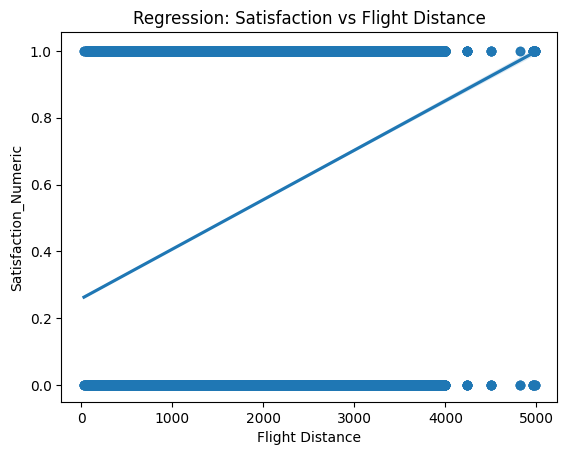

In [9]:
# Prepare features and target
X = data[['Flight Distance', 'In-flight Service']]
y = data['Satisfaction_Numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Visualize results
sns.regplot(x=data['Flight Distance'], y=data['Satisfaction_Numeric'])
plt.title('Regression: Satisfaction vs Flight Distance')
plt.show()
            